<h1 style="font-size:40px;"><center>Exercise II:<br> Convolutional Neural Networks
</center></h1>

## Short summary
In this exercise, we will design a CNN to classify rgb images. These folder has **three files**: 
- **configClassifier.py:** this involves definitions of all parameters and data paths
- **utilsClassifier.py:** includes utility functions required to grab and visualize data 
- **runClassifier.ipynb:** contains the script to design, train and test the network 

Make sure that before running this script, you created an environment and **installed all required libraries** such 
as keras.

## The data
There exists also a subfolder called **data** which contains the traning, validation, and testing data each has both RGB input images together with the corresponding ground truth images.


## The exercises
As for the previous lab all exercises are found below.


## The different 'Cells'
This notebook contains several cells with python code, together with the markdown cells (like this one) with only text. Each of the cells with python code has a "header" markdown cell with information about the code. The table below provides a short overview of the code cells. 

| #  |  CellName | CellType | Comment |
| :--- | :-------- | :-------- | :------- |
| 1 | Init | Needed | Sets up the environment|
| 2 | Ex | Exercise 1| A class definition of a CNN model  |
| 3 | Loading | Needed | Loading parameters and initializing the model |
| 4 | Stats | Needed | Show data distribution |
| 5 | Ex | Exercise 2 | Data augementation |
| 6 | Data | Needed | Generating the data batches |
| 7 | Debug | Needed | Debugging the data |
| 8 | Device | Needed | Selecting CPU/GPU |
| 9 | Optimization | Exercise 2 | Selecting an optimization method |
| 10 | Training | Exercise 1-2-3 | Training the model   |
| 11 | Testing | Exercise 1-2-3| Testing the  method   |
| 12 | Confusion matrix | Information | Plotting the confusion matrix|
| 13 | Plotting | Information  | View some of test samples |
| 13 | Plotting | Information  | View layer activations|


In order for you to start with the exercise you need to run all cells. It is important that you do this in the correct order, starting from the top and work you way down the cells. Later when you have started to work with the notebook it may be easier to use the command "Run All" found in the "Cell" dropdown menu.

## Writing the report
First the report should be written within this notebook. We have prepared the last cell in this notebook for you where you should write the report. The report should contain 4 parts:

* Name:
* Introduction: A **few** sentences where you give a small introduction of what you have done in the lab.
* Answers to questions: For each of the questions provide an answer. It can be short answers or a longer ones depending on the nature of the questions, but try to be effective in your writing.
* Conclusion: Summarize your findings in a few sentences.
  

1) We first start with importing all required modules

In [132]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import tensorflow as tf
from tensorflow import keras 
from configClassifier import *
from utilsClassifier import *
from sklearn.metrics import confusion_matrix
import seaborn as sns
from datetime import datetime
import os
import pprint

# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.models import Model
from keras.callbacks import TensorBoard

/home/stud/f/fremar16/Deep_learning/miniconda3/envs/lab/lib/python3.8/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


2) Here, we have the network model class definition. In this class, the most important function is the one called **create_model()**. As defined in the exercises section, your task is to update the network architecture defined in this function such that the network will return the highest accuracy for the given training, validation, and testing data.

In [133]:
class ClassifierDNNModel():
    def __init__(self, num_classes=10, batch_size=32, inputShape=(64,64,3), dropout_prob=0.25):
        # super(MyModel, self).__init__(name='my_model')
        self.num_classes = num_classes
        self.batch_size = batch_size
        self.inputShape = inputShape
        self.dropout_prob = dropout_prob

    def create_model(self):
        model = Sequential()
        keras.regularizers.l2(0.0001)
        chanDim = -1
        # CONV => RELU => POOL
        model.add(Conv2D(15, (3, 3), padding="same",
                         input_shape=self.inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(3, 3)))
        model.add(Dropout(0.2))
        model.add(BatchNormalization())
        
        model.add(Conv2D(25, (3, 3), padding="same",
                         input_shape=self.inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(3, 3)))
        model.add(Dropout(0.2))
        model.add(BatchNormalization())
        
        model.add(Flatten())
        model.add(Dense(15, kernel_regularizer='l2'))
        model.add(Activation("relu"))
        model.add(Dropout(0.2))
        model.add(BatchNormalization())
        
        model.add(Dense(self.num_classes, kernel_regularizer='l2'))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

    def display_activation(self, activations, col_size, row_size, act_index):
        activation = activations[act_index]
        activation_index = 0
        fig, ax = plt.subplots(row_size, col_size, figsize=(row_size * 2.5, col_size * 1.5))
        fig.suptitle("activations in layer " + str(act_index+1))

        for row in range(0, row_size):
            for col in range(0, col_size):
                ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
                activation_index += 1
        plt.show()
    
    

3) We import the network **hyperparameters** and build a simple cnn by calling the class introduced in the previous step. Please note that to change the hyperparameters, you just need to change the values in the file called **configClassifier.py.**

In [134]:
cfg = flying_objects_config()
image_shape = (cfg.IMAGE_HEIGHT, cfg.IMAGE_WIDTH, cfg.IMAGE_CHANNEL)
modelObj = ClassifierDNNModel(num_classes=len(cfg.CLASSES), batch_size=cfg.BATCH_SIZE, inputShape=image_shape, dropout_prob=cfg.DROPOUT_PROB)
model = modelObj.create_model()
print(cfg)

{'training_data_dir': '../data/FlyingObjectDataset_10K/training', 'validation_data_dir': '../data/FlyingObjectDataset_10K/validation', 'testing_data_dir': '../data/FlyingObjectDataset_10K/testing', 'fineGrained': False, 'CLASSES': ['square', 'triangle', 'circular'], 'NUM_CLASS': 3, 'GPU': 0, 'DROPOUT_PROB': 0.5, 'IMAGE_WIDTH': 128, 'IMAGE_HEIGHT': 128, 'IMAGE_CHANNEL': 3, 'NUM_EPOCHS': 10, 'BATCH_SIZE': 32, 'LEARNING_RATE': 0.001, 'LR_DECAY_FACTOR': 0.1, 'PRINT_EVERY': 20, 'SAVE_EVERY': 1, 'DEBUG_MODE': True, 'DATA_AUGMENTATION': True}


4) We call the utility function **show_statistics** to display the data distribution. This is just for debugging purpose.

In [135]:
#### show how the data looks like
show_statistics(cfg.training_data_dir, fineGrained=cfg.fineGrained, title=" Training Data Statistics ")
show_statistics(cfg.validation_data_dir, fineGrained=cfg.fineGrained, title=" Validation Data Statistics ")
show_statistics(cfg.testing_data_dir, fineGrained=cfg.fineGrained, title=" Testing Data Statistics ")


######################################################################
##################### Training Data Statistics #####################
######################################################################
total image number 	 10817
total class number 	 3
class square 	 3488 images
class circular 	 3626 images
class triangle 	 3703 images
######################################################################

######################################################################
##################### Validation Data Statistics #####################
######################################################################
total image number 	 2241
total class number 	 3
class triangle 	 745 images
class square 	 783 images
class circular 	 713 images
######################################################################

######################################################################
##################### Testing Data Statistics #####################
##########################

5) We **augment** the data by flipping the image horizontally or vertically. As described in the exercises section below, one of your tasks is to update this data augmentation part in order to increase the network efficiency.

In [136]:
# setup data
if cfg.DATA_AUGMENTATION:
    print("Data is being augmented!")
    aug_parameters = ImageDataGenerator(
        # zoom_range=0.2, # randomly zoom into images
        # rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        # width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        # height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images
else:
    print("Data will not be augmented!")
    aug_parameters = ImageDataGenerator(
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


Data is being augmented!


6) We now create batch generators to get small batches from the entire dataset. There is no need to change these functions as they already return **normalized inputs as batches**.

In [137]:
nbr_train_data = get_dataset_size(cfg.training_data_dir)
nbr_valid_data = get_dataset_size(cfg.validation_data_dir)
nbr_test_data = get_dataset_size(cfg.testing_data_dir)
train_batch_generator = generate_classification_batches(cfg.training_data_dir, image_shape, cfg.BATCH_SIZE, cfg.CLASSES, fineGrained=cfg.fineGrained)
valid_batch_generator = generate_classification_batches(cfg.validation_data_dir, image_shape, cfg.BATCH_SIZE, cfg.CLASSES, fineGrained=cfg.fineGrained)
test_batch_generator = generate_classification_batches(cfg.testing_data_dir, image_shape, cfg.BATCH_SIZE, cfg.CLASSES, fineGrained=cfg.fineGrained)
aug_train_batch_generator = generate_augmented_classification_batches(train_batch_generator, aug_parameters)
aug_valid_batch_generator = generate_augmented_classification_batches(valid_batch_generator, aug_parameters)
print("Data batch generators are created!")

Data batch generators are created!


7) We can visualize how the data looks like for debugging purpose

In [138]:
if cfg.DEBUG_MODE:
    t_x, t_y = next(train_batch_generator)
    print('x', t_x.shape, t_x.dtype, t_x.min(), t_x.max())
    print('y', t_y.shape, t_y.dtype, t_y.min(), t_y.max())
    a_x, a_y = next(aug_train_batch_generator)
    print('x', a_x.shape, a_x.dtype, a_x.min(), a_x.max())
    print('y', a_y.shape, a_y.dtype, a_y.min(), a_y.max())

x (32, 128, 128, 3) float64 0.0 1.0
y (32, 3) float32 0.0 1.0
x (32, 128, 128, 3) float32 0.0 1.0
y (32, 3) float32 0.0 1.0


8) We select which processing unit to use, either CPU or GPU. In case of having multiple GPUs, we can still select which GPU to use.

In [139]:
if cfg.GPU >=0:
    print("creating network model using gpu " + str(cfg.GPU))
    os.environ['CUDA_VISIBLE_DEVICES'] = str(cfg.GPU)
elif cfg.GPU >=-1:
    print("creating network model using cpu ")  
    os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
    os.environ["CUDA_VISIBLE_DEVICES"] = ""

creating network model using gpu 0


9) We set the training configuration. As a part of the exercises, this function can also be updated to test different **optimization methods** such as **SGD, ADAM,** etc.

In [140]:
opt = tf.optimizers.Adam(cfg.LEARNING_RATE)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer= opt, metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 15)      420       
_________________________________________________________________
activation_32 (Activation)   (None, 128, 128, 15)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 42, 42, 15)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 42, 42, 15)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 42, 42, 15)        60        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 42, 42, 25)        3400      
_________________________________________________________________
activation_33 (Activation)   (None, 42, 42, 25)      

10) We can now feed the training and validation data to the network. This will train the network for **some epochs**. Note that the epoch number is also predefined in the file called **configClassifier.py.**

In [141]:
history = model.fit(aug_train_batch_generator,
          epochs=cfg.NUM_EPOCHS,
          verbose=1,
          steps_per_epoch=(nbr_train_data//cfg.BATCH_SIZE), # total batch number
          validation_steps=(nbr_valid_data // cfg.BATCH_SIZE), # total batch number
          validation_data=aug_valid_batch_generator,
          callbacks=[TensorBoard(log_dir="logs/{}".format(datetime.now().strftime("%Y%m%d-%H%M%S")), write_graph=True, write_images=False,
                                 histogram_freq=0)])


Epoch 1/10
338/338 [==============================] - 49s 144ms/step - loss: 1.3403 - accuracy: 0.4980 - val_loss: 1.3877 - val_accuracy: 0.3500
Epoch 2/10
338/338 [==============================] - 43s 129ms/step - loss: 0.8497 - accuracy: 0.7591 - val_loss: 1.7412 - val_accuracy: 0.5112
Epoch 3/10
338/338 [==============================] - 42s 126ms/step - loss: 0.5731 - accuracy: 0.8865 - val_loss: 1.4136 - val_accuracy: 0.5978
Epoch 4/10
338/338 [==============================] - 44s 129ms/step - loss: 0.4661 - accuracy: 0.9218 - val_loss: 0.8900 - val_accuracy: 0.7589
Epoch 5/10
338/338 [==============================] - 44s 130ms/step - loss: 0.4026 - accuracy: 0.9424 - val_loss: 0.7037 - val_accuracy: 0.8147
Epoch 6/10
338/338 [==============================] - 43s 128ms/step - loss: 0.3697 - accuracy: 0.9497 - val_loss: 0.6164 - val_accuracy: 0.8585
Epoch 7/10
338/338 [==============================] - 43s 128ms/step - loss: 0.3443 - accuracy: 0.9545 - val_loss: 0.5820 - val_ac

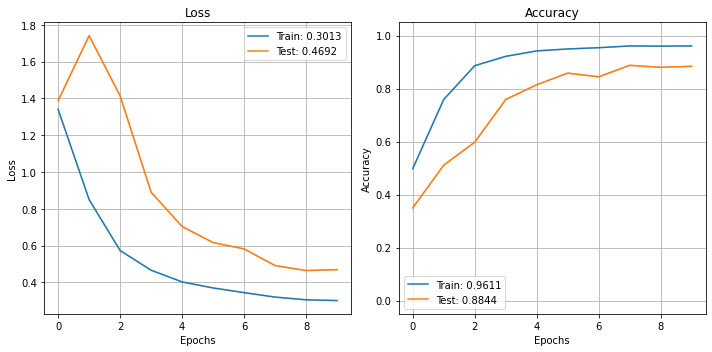

In [142]:
from plot_keras_history import plot_history, chain_histories# pip install plot_keras_history
import matplotlib.pyplot as plt

plot_history(history.history)
plt.show()
plot_history(history.history)
plt.close()

11) We can test the model with the test data

In [143]:
# testing model
test_result = model.evaluate(test_batch_generator,
                                       steps=(nbr_test_data//cfg.BATCH_SIZE))
test_loss = round(test_result[0], 4)
test_acc = round(test_result[1], 4)
print("Test Loss: ", str(test_loss), "Test Accuracy: ", str(test_acc))

69/69 [==============================] - 8s 115ms/step - loss: 0.4667 - accuracy: 0.8832
Test Loss:  0.4667 Test Accuracy:  0.8832


12) We can plot a confusion matrix showing **the class-wise accuracies**

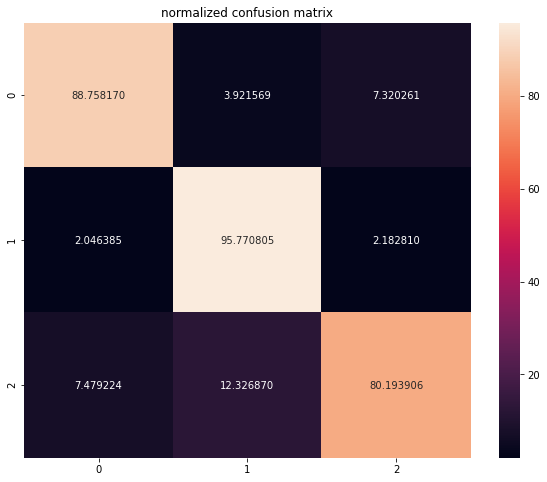

In [144]:
true_classes = []
pred_classes = []
for i in range(0, nbr_test_data//cfg.BATCH_SIZE +1):
    t_data, t_label = next(test_batch_generator)
    pred_labels = model.predict(t_data, batch_size=cfg.BATCH_SIZE)
    pred_classes.extend(np.argmax(pred_labels, axis=1))
    true_classes.extend(np.argmax(t_label, axis=1))
#print (" true classes: " + str(len(true_classes))  + " pred classes: " + str(len(pred_classes)))
confusion_mtx = confusion_matrix(np.array(true_classes), np.array(pred_classes))
plt.figure(figsize=(10, 8))
plt.title("normalized confusion matrix")
norm_confusion_mtx = 100* confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]
sns.heatmap(norm_confusion_mtx, annot=True, fmt="f")
plt.show()

13) We can also show sample classification results

(128, 128, 3)


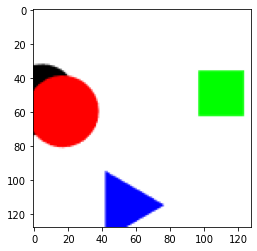

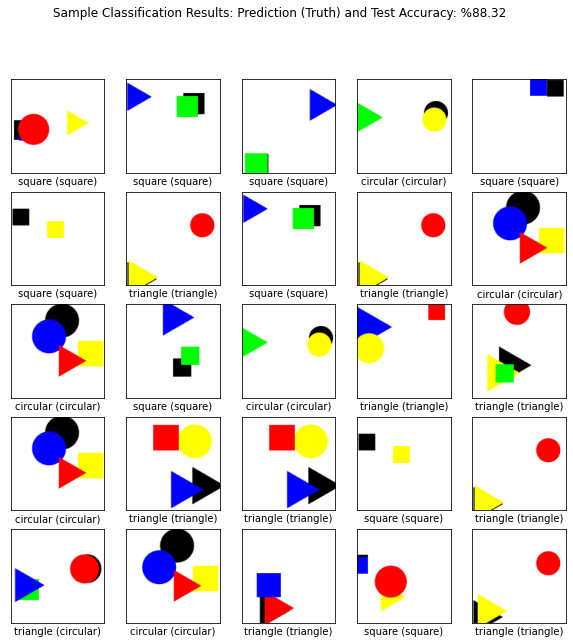

In [145]:
t_data, t_label = next(test_batch_generator)
print(t_data[0].shape)
plt.imshow(t_data[0])
pred_labels = model.predict(t_data, batch_size=cfg.BATCH_SIZE)
plot_sample_classification_results(t_data, t_label, cfg.CLASSES, pred_labels, test_acc)

14) Finally, we can visualize CNN layer activations for a given sample input 

IndexError: index 15 is out of bounds for axis 3 with size 15

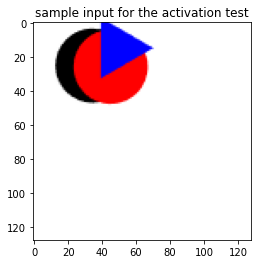

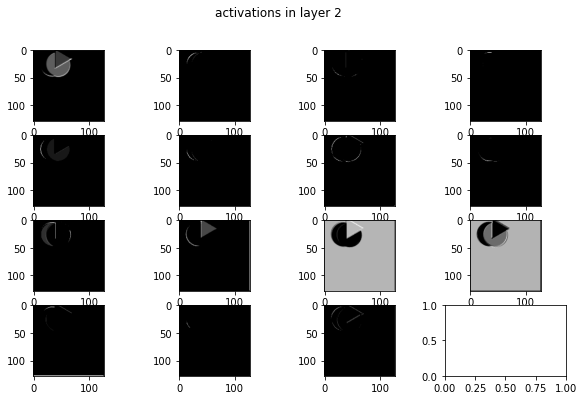

In [146]:
# Visualize CNN Layers
t_data, t_label = next(test_batch_generator)
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(t_data[10].reshape(1, cfg.IMAGE_HEIGHT, cfg.IMAGE_WIDTH, cfg.IMAGE_CHANNEL))

plt.imshow(t_data[10])
plt.title("sample input for the activation test")
modelObj.display_activation(activations, 4, 4, 1) # Displaying output of layer 2
modelObj.display_activation(activations, 4, 4, 3) # Displaying output of layer 4
modelObj.display_activation(activations, 4, 4, 4) # Displaying output of layer 5

## EXERCISES

Please do all exercises desribed below. Note that all your source code as well as the log folders must be provided as final results **before April 05, 2019.** 


#### Exercise 1)
Update the network architecture given in the function **create_model** of the class ClassifierDNNModel. 

**Hint:** You can add more convolution, max pooling layers etc. Batch normalization and dropout are other options to be considered. You can also try applying different activation functions.

In [ ]:
model.add(Conv2D(25, (3, 3), padding="same",
                         input_shape=self.inputShape))
        model.add(Activation("relu"))
        model.add(Dropout(0.2))
        #model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(3, 3)))

        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(50, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        # Some added layer
        model.add(Conv2D(50, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(Dropout(0.2))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        # Some added layer
        model.add(Conv2D(50, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        # Some added layer
        model.add(Conv2D(50, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(Dropout(0.2))
        model.add(MaxPooling2D(pool_size=(2, 2)))
    
        # Some added layer
        model.add(Conv2D(50, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(2048))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(self.num_classes))
        model.add(Activation("softmax"))

#### Exercise 2) 
Use different **optimization** (e.g. ADAM, SGD, etc) and **regularization** (e.g. data augmentation, dropout) methods to increase the network accuracy. 

In [ ]:
#opt = tf.optimizers.Adam(cfg.LEARNING_RATE)
opt = tf.optimizers.Adam(cfg.LEARNING_RATE)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer= opt, metrics=['accuracy'])
model.summary()

In [ ]:
#opt = tf.optimizers.Adam(cfg.LEARNING_RATE)
opt = tf.optimizers.SGD(cfg.LEARNING_RATE)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer= opt, metrics=['accuracy'])
model.summary()

In [ ]:
cfg.DATA_AUGMENTATION=True

#### Exercise 3)
In the file **configClassifier.py**, there is a flag named as **cfg.fineGrained** which is set to **False**. This flag defines the classification granularity level. In the default setting, i.e. when it is **False**, there exist 3 class types: **Square**, **Triangle**, and **Circle**. In case of switching this flag to **True**, the class number goes to 15. Repeat previous exercises 1) and 2) after setting this flag to **True** and provide results. 

#### Hint:
All network resposes are stored in a **log folder** which is automatically created. To visualize these responses, we can use the tensorboard as follows:
- First make sure that there is a new folder created with **a date and time stamp** under folder **logs**
- Next, open a terminal and type 
    > tensorboard --logdir=./logs
- Finally, open a web browser and type 
    > http://localhost:6006
- You can have an overview of all accuracies on the tensorboard. For more information about tensorboard, please see https://www.tensorflow.org/guide/summaries_and_tensorboard

# The report!
Name : Fredrik MÃ¥rtensson

## Introduction
This is the second project in the course Deep learning. The project gives an deep understanding of regularization and optimization for models. Three tasks where a model will be created, updated to handle overfitting and underfitting and then compared how it handles 15 different classes. Results for different models is presented and their logs for future references. The models was analysed with tensorboard and compared towards each other in order to get an understanding of the presented result.

## Answers to questions
### 1) 
The idea behind the first task was to make a simple model that would overfit. The model is trying to define edges using x and y coordinates. Number of neurons is defined by 15 neurons and then 25 in the next conv2D layer. There was some confusion in how to structure the model but after realising that the smaller the better it became easier to approach the problem. Since no regularization is applied it is suggested that the result would be ~0.3 and not converge due to the simplicity of the model.

* model.add(Conv2D(15, (3, 3), padding="same",input_shape=self.inputShape))
* model.add(Activation("relu"))
* model.add(MaxPooling2D(pool_size=(3, 3))) 
* model.add(Conv2D(25, (3, 3), padding="same",input_shape=self.inputShape))
* model.add(Activation("relu"))
* model.add(MaxPooling2D(pool_size=(3, 3)))
* model.add(Flatten())
* model.add(Dense(20))
* model.add(Activation("relu"))
* model.add(Dense(self.num_classes))
* model.add(Activation("softmax"))

### 2)
The model was running with the same "ground" layers with modifications to take care of overfitting and underfitting. Multiple parameters where tested but concluded into a few "final" models. It is observed as before that tanh did not improve the model and SGD gave a worse result than ADAM. Dropout felt good at 0.2 but could be increased a little if wanted. It is observed that the ADAM model gave a better Test accuracy score than validation accuracy which is good.  With augmentation the model got a little worse during training but performed better on testing.

* "20201205-141413": SGD, normalise, dropout:0.2, l2:0.0001 - loss: 1.2273 - accuracy: 0.5551 - val_loss: 3.0604 - val_accuracy: 0.3504 - Test loss: 3.0943 Test Accuracy:  0.3447
* "20201205-142909":  ADAM, normalise, dropout:0.2, l2:0.0001 - loss: 0.3076 - accuracy: 0.9640 - val_loss: 0.4998 - val_accuracy: 0.8696 - Test Loss:  0.5182 Test Accuracy:  0.8723
* "20201205-144922": ADAM, normalise, dropout:0.2, l2:0.0001,augmentation - loss: 0.2617 - accuracy: 0.9698 - val_loss: 0.4421 - val_accuracy: 0.8978 - Test Loss:  0.4253 Test Accuracy:  0.9049

### 3)
The result was not as expected. The expected result would be that the accuracy would go down compared to task 2 but testing accuracy went up. As observed the test accuracy is 0.9044 compared to the test accuracy of best model in task 2.
* "20201205-150621": loss: 0.2734 - accuracy: 0.9674 - val_loss: 0.5160 - val_accuracy: 0.8884 - Test Loss:  0.456 Test Accuracy:  0.9049

## Summary
The project contained a lot of exploring of different parameters. There was a few parameters including tanh and SGD that did not improve model at all. The result from task 3 was surprisingly good and better than expected without any further modifications on the model. For future references the tensorboard is a good tool that can help to analyse without doing additional plots to see the result of models.